In [1]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


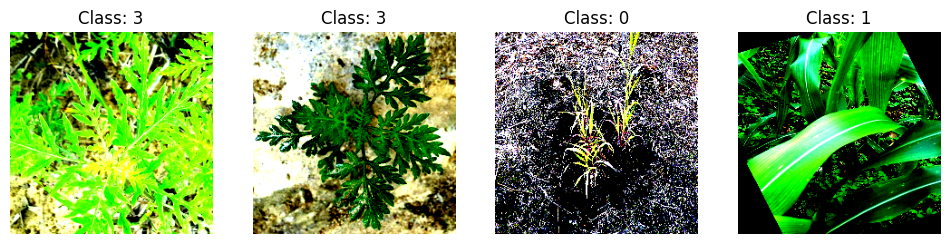

Training dataset size: 1131
Validation dataset size: 283


In [2]:
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import transforms, models
from torchvision.datasets import ImageFolder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Define the new image size
new_image_size = (224, 224)

# Define a custom dataset class for handling OpenCV transformations
class CustomDataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.data = ImageFolder(root)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path, label = self.data.imgs[idx]
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV reads images in BGR format

        if self.transform:
            image = self.transform(image)

        return image, label

# OpenCV equivalent of the transforms
def custom_opencv_transform(image):
    # Resize
    image = cv2.resize(image, new_image_size)

    # Convert to torch tensor
    image = np.transpose(image, (2, 0, 1)).astype(np.float32) / 255.0
    image = torch.from_numpy(image)

    # Normalize
    mean = torch.tensor([0.485, 0.456, 0.406])
    std = torch.tensor([0.229, 0.224, 0.225])
    image = (image - mean[:, None, None]) / std[:, None, None]

    return image

# Create custom dataset
dataset = CustomDataset(root='WEEDdataset', transform=custom_opencv_transform)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
sample_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0)
sample_batch = next(iter(sample_loader))
# Extract images and labels from the sample batch
sample_images, sample_labels = sample_batch

fig, axes = plt.subplots(1, len(sample_labels), figsize=(12, 4))

for i, ax in enumerate(axes):
    ax.imshow(np.transpose(sample_images[i], (1, 2, 0)))
    ax.set_title(f"Class: {sample_labels[i]}")
    ax.axis('off')

plt.show()

print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")

In [8]:
# Create dataloaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)

# Define ResNet-50 model
model = models.resnet50(pretrained=True)
num_classes = len(dataset.data.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001, weight_decay=0.8)

# Set the device to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

c:\Users\rpcl_\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rpcl_\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Train - Epoch [1/10], Loss: 1.2892, Accuracy: 43.94%
Validation - Epoch [1/10], Loss: 1.1464, Accuracy: 65.72%
Model saved at epoch 1
Train - Epoch [2/10], Loss: 1.0669, Accuracy: 75.24%
Validation - Epoch [2/10], Loss: 0.9441, Accuracy: 84.45%
Model saved at epoch 2
Train - Epoch [3/10], Loss: 0.8944, Accuracy: 86.65%
Validation - Epoch [3/10], Loss: 0.8046, Accuracy: 91.52%
Model saved at epoch 3
Train - Epoch [4/10], Loss: 0.7763, Accuracy: 92.57%
Validation - Epoch [4/10], Loss: 0.6667, Accuracy: 95.41%
Model saved at epoch 4
Train - Epoch [5/10], Loss: 0.6520, Accuracy: 96.99%
Validation - Epoch [5/10], Loss: 0.5655, Accuracy: 98.59%
Model saved at epoch 5
Train - Epoch [6/10], Loss: 0.5356, Accuracy: 98.41%
Validation - Epoch [6/10], Loss: 0.4807, Accuracy: 99.29%
Model saved at epoch 6
Train - Epoch [7/10], Loss: 0.4559, Accuracy: 98.67%
Validation - Epoch [7/10], Loss: 0.4020, Accuracy: 99.65%
Model saved at epoch 7
Train - Epoch [8/10], Loss: 0.4092, Accuracy: 99.29%
Validatio

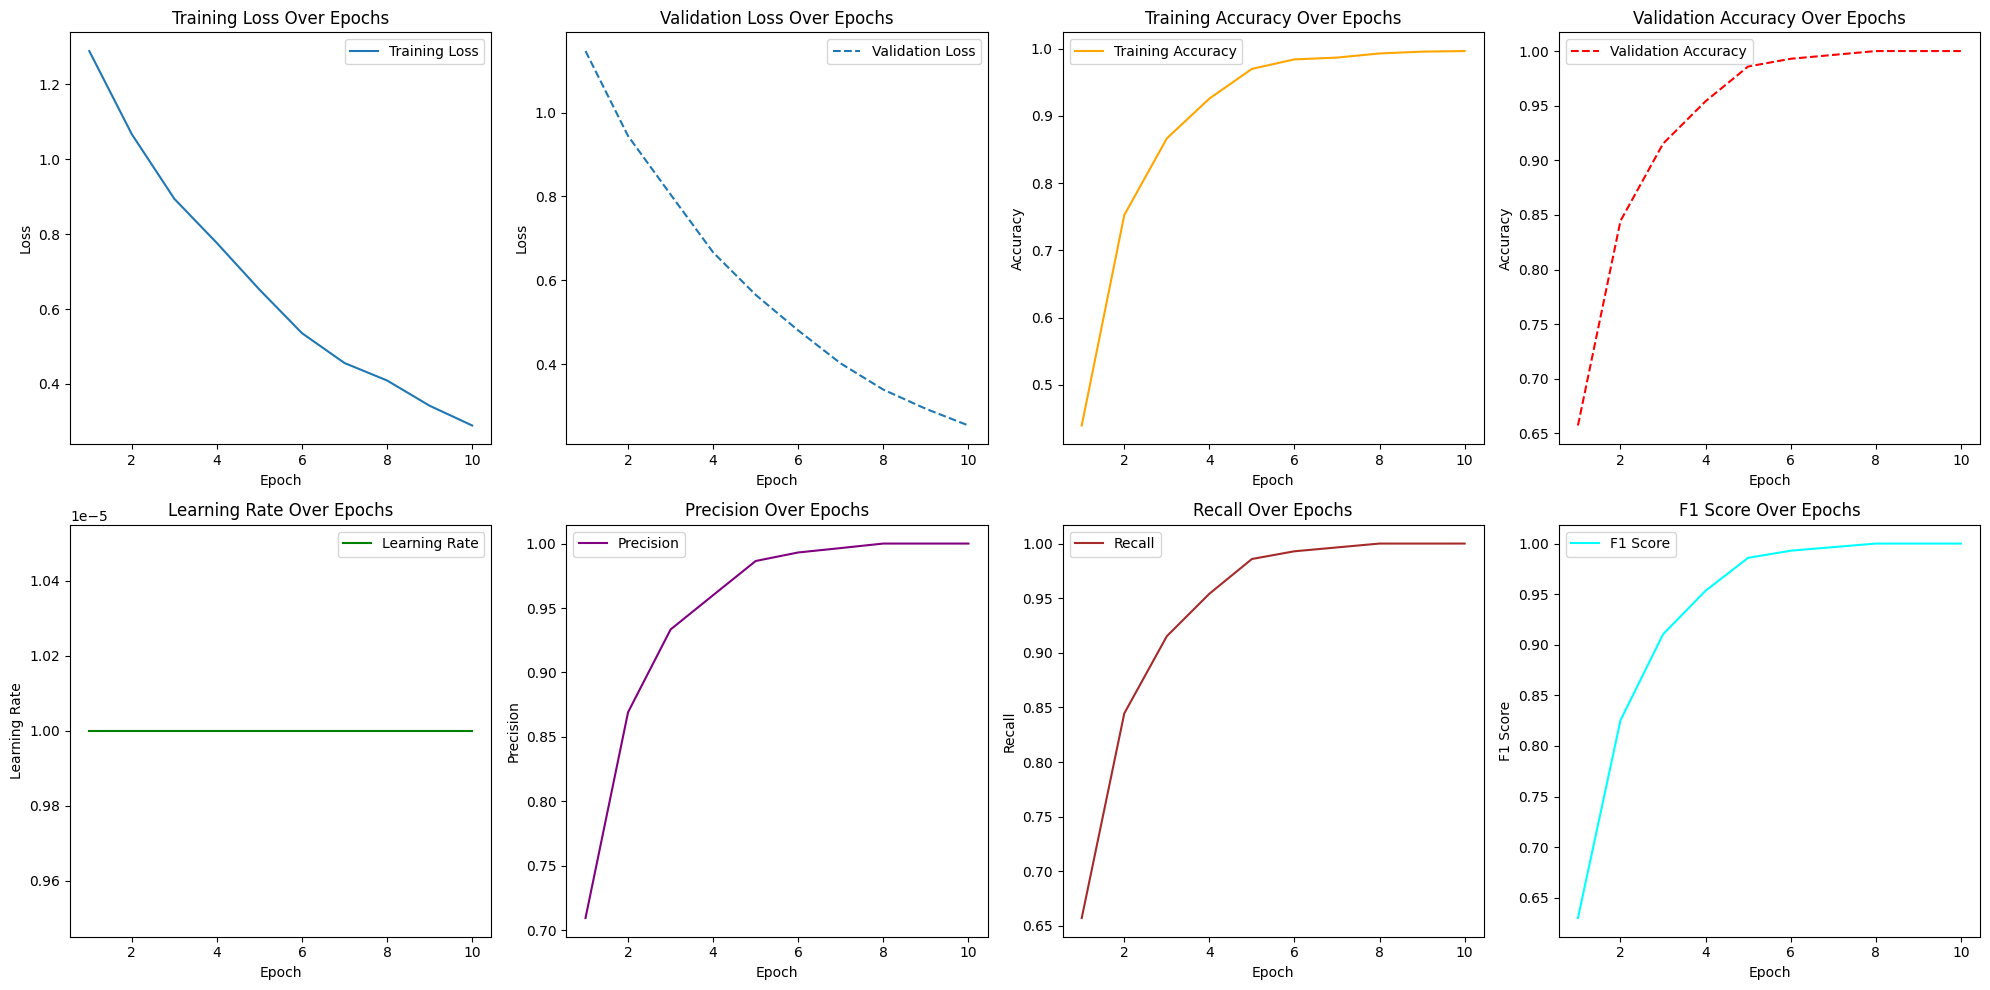

In [9]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'model' is  neural network model
# Assuming 'optimizer' is  optimizer
# Assuming 'criterion' is  loss function
# Assuming 'train_loader' is  training data loader
# Assuming 'val_loader' is  validation data loader



epochs = 10
save_path = 'models/'



# Lists to store training and validation statistics for plotting
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
learning_rates = []
precision_scores = []
recall_scores = []
f1_scores = []

for epoch in range(epochs):
    model.train()  # Set the model to training mode
    total_loss = 0
    correct_predictions = 0
    total_samples = 0
    all_labels_train = []
    all_predictions_train = []

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        all_labels_train.extend(labels.cpu().numpy())
        all_predictions_train.extend(predicted.cpu().numpy())

    average_loss = total_loss / len(train_loader)
    accuracy = correct_predictions / total_samples
    print(f'Train - Epoch [{epoch+1}/{epochs}], Loss: {average_loss:.4f}, Accuracy: {accuracy * 100:.2f}%')

    # Validation
    model.eval()  # Set the model to evaluation mode
    val_loss = 0
    val_correct_predictions = 0
    val_total_samples = 0
    all_labels_val = []
    all_predictions_val = []

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)

            val_outputs = model(val_inputs)
            val_loss += criterion(val_outputs, val_labels).item()

            _, val_predicted = torch.max(val_outputs, 1)
            val_correct_predictions += (val_predicted == val_labels).sum().item()
            val_total_samples += val_labels.size(0)

            all_labels_val.extend(val_labels.cpu().numpy())
            all_predictions_val.extend(val_predicted.cpu().numpy())

    val_average_loss = val_loss / len(val_loader)
    val_accuracy = val_correct_predictions / val_total_samples
    print(f'Validation - Epoch [{epoch+1}/{epochs}], Loss: {val_average_loss:.4f}, Accuracy: {val_accuracy * 100:.2f}%')

    # Save the model at the end of each epoch
    model_filename = f'my_trained_model_epoch_{epoch + 1}.pth'
    torch.save(model.state_dict(), save_path + model_filename)
    print(f'Model saved at epoch {epoch + 1}')

    # Append training and validation statistics for plotting
    train_losses.append(average_loss)
    train_accuracies.append(accuracy)
    val_losses.append(val_average_loss)
    val_accuracies.append(val_accuracy)
    learning_rates.append(optimizer.param_groups[0]['lr'])  # Assuming a single learning rate for simplicity

    # Calculate precision, recall, and F1 score
    precision = precision_score(all_labels_val, all_predictions_val, average='weighted')
    recall = recall_score(all_labels_val, all_predictions_val, average='weighted')
    f1 = f1_score(all_labels_val, all_predictions_val, average='weighted')

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
        

            

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Plot Training Loss
axes[0, 0].plot(range(1, epochs + 1), train_losses, label='Training Loss')
axes[0, 0].set_title('Training Loss Over Epochs')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# Plot Validation Loss
axes[0, 1].plot(range(1, epochs + 1), val_losses, label='Validation Loss', linestyle='--')
axes[0, 1].set_title('Validation Loss Over Epochs')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# Plot Training Accuracy
axes[0, 2].plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy', color='orange')
axes[0, 2].set_title('Training Accuracy Over Epochs')
axes[0, 2].set_xlabel('Epoch')
axes[0, 2].set_ylabel('Accuracy')
axes[0, 2].legend()

# Plot Validation Accuracy
axes[0, 3].plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy', color='red', linestyle='--')
axes[0, 3].set_title('Validation Accuracy Over Epochs')
axes[0, 3].set_xlabel('Epoch')
axes[0, 3].set_ylabel('Accuracy')
axes[0, 3].legend()

# Plot Learning Rate
axes[1, 0].plot(range(1, epochs + 1), learning_rates, label='Learning Rate', color='green')
axes[1, 0].set_title('Learning Rate Over Epochs')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Learning Rate')
axes[1, 0].legend()

# Plot Precision
axes[1, 1].plot(range(1, epochs + 1), precision_scores, label='Precision', color='purple')
axes[1, 1].set_title('Precision Over Epochs')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Precision')
axes[1, 1].legend()

# Plot Recall
axes[1, 2].plot(range(1, epochs + 1), recall_scores, label='Recall', color='brown')
axes[1, 2].set_title('Recall Over Epochs')
axes[1, 2].set_xlabel('Epoch')
axes[1, 2].set_ylabel('Recall')
axes[1, 2].legend()

# Plot F1 Score
axes[1, 3].plot(range(1, epochs + 1), f1_scores, label='F1 Score', color='cyan')
axes[1, 3].set_title('F1 Score Over Epochs')
axes[1, 3].set_xlabel('Epoch')
axes[1, 3].set_ylabel('F1 Score')
axes[1, 3].legend()

plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import torch
from torchvision import transforms
import cv2
import shutil

# Assuming you've loaded your pre-trained model into the 'model' variable
import torch
from torchvision import models  # Adjust this import based on your actual model architecture

# Assuming you have defined your model architecture
# Replace the following line with the actual definition of your model
model = models.resnet50(pretrained=False, num_classes=4)

# Specify the path to your saved model file
model_path = 'models/my_trained_model_epoch_10.pth'  # Adjust the path accordingly

# Load the model state dictionary
model.load_state_dict(torch.load(model_path))

# Set the model to evaluation mode
model.eval()

test_transform = transforms.Compose([ # Assuming your model was trained with this input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define a dictionary to map class indices to class labels
class_mapping = {
    0: 'foxtail',
    1: 'maize_crop',
    2: 'pigweed',
    3: 'ragWeed'
}

# Path to the folder containing test images
test_folder_path = 'test_set'

# Output folder for organized images
output_folder = 'organized_test_set'
os.makedirs(output_folder, exist_ok=True)

# Evaluate the model on the test images
with torch.no_grad():
    for class_folder in os.listdir(test_folder_path):
        class_folder_path = os.path.join(test_folder_path, class_folder)
        
        if not os.path.isdir(class_folder_path):
            continue  # Skip if it's not a subdirectory
            
        for image_file in os.listdir(class_folder_path):
            # Load and preprocess the image using OpenCV
            image_path = os.path.join(class_folder_path, image_file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            image = cv2.resize(image, (224, 224))  # Resize
            image = transforms.ToPILImage()(image)  # Convert to PIL Image
            input_tensor = test_transform(image).unsqueeze(0)  # Add batch dimension

            # Get the model prediction
            output = model(input_tensor)
            _, predicted = torch.max(output, 1)

            # Map the numerical prediction to the class label
            predicted_label = class_mapping[predicted.item()]

            # Create a folder for the predicted class if it doesn't exist
            predicted_class_folder = os.path.join(output_folder, predicted_label)
            os.makedirs(predicted_class_folder, exist_ok=True)

            # Move the image to the predicted class folder
            shutil.copy(image_path, os.path.join(predicted_class_folder, image_file))

            # Display the image along with the predicted label
            plt.imshow(image)
            plt.title(f"Actual Class: {class_folder} | Predicted Class: {predicted_label}")
            plt.axis('off')
            plt.show()